<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#基础模型" data-toc-modified-id="基础模型-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>基础模型</a></span></li><li><span><a href="#常量初始化变量" data-toc-modified-id="常量初始化变量-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>常量初始化变量</a></span></li><li><span><a href="#参考" data-toc-modified-id="参考-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>参考</a></span></li></ul></div>

## 基础模型

In [21]:
! pip list|grep torch

pytorch-lightning                 1.9.0
torch                             1.13.0
torchaudio                        0.13.0
torchmetrics                      0.11.0


In [6]:
import onnx
from onnx import helper
from onnx import TensorProto

基于onnx实现一个线性函数`y=a*x+b`，输入类型为int，大小为`2*3`

In [3]:
# 定义张量
a = helper.make_tensor_value_info("a", TensorProto.INT32, [2, 3])
x = helper.make_tensor_value_info("x", TensorProto.INT32, [3, 2])
b = helper.make_tensor_value_info("b", TensorProto.INT32, [2, 2])
y = helper.make_tensor_value_info("y", TensorProto.INT32, [2, 2])

In [4]:
# 定义算子
node_mul = helper.make_node("Mul", ["a", "x"], ["c"])
node_add = helper.make_node("Add", ["c", "b"], ["y"])

In [6]:
# 定义计算图
graph = helper.make_graph([node_mul, node_add], "linear_func", [a, x, b], [y])

In [7]:
# 定义模型
model = helper.make_model(graph)

In [8]:
onnx.checker.check_model(model)
onnx.save(model, "linear_func.onnx")

In [9]:
print(model)

ir_version: 9
graph {
  node {
    input: "a"
    input: "x"
    output: "c"
    op_type: "Mul"
  }
  node {
    input: "c"
    input: "b"
    output: "y"
    op_type: "Add"
  }
  name: "linear_func"
  input {
    name: "a"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 3
          }
        }
      }
    }
  }
  input {
    name: "x"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 3
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  input {
    name: "b"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  output {
    name: "y"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            d

TypeProto

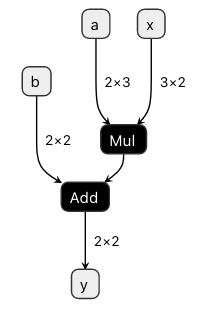

## 常量初始化变量

初始化a和b为常量

In [24]:
import numpy as np

In [25]:
# 定义张量
weight = np.random.randn(2, 3).astype(np.int32)
bias = np.random.randn(2, 2).astype(np.int32)

a = helper.make_tensor("a", TensorProto.INT32, [2, 3], weight.flatten().tolist())
x = helper.make_tensor_value_info("x", TensorProto.INT32, [3, 2])
b = helper.make_tensor("b", TensorProto.INT32, [2, 2], bias.flatten().tolist())
y = helper.make_tensor_value_info("y", TensorProto.INT32, [2, 2])

In [26]:
# 定义算子
node_mul = helper.make_node("Mul", ["a", "x"], ["c"])  # ！！ a和x的顺序决定了是a*x 不是x*a
node_add = helper.make_node("Add", ["c", "b"], ["y"])

In [27]:
# 定义计算图
# !!! 这里只有x是输入，a和b则成为了initializer
graph = helper.make_graph([node_mul, node_add], "linear_func", [x], [y], [a, b])

In [28]:
# 定义模型
model = helper.make_model(graph)

In [29]:
onnx.checker.check_model(model)
onnx.save(model, "linear_func_initialize.onnx")

In [30]:
print(model)

ir_version: 8
graph {
  node {
    input: "a"
    input: "x"
    output: "c"
    op_type: "Mul"
  }
  node {
    input: "c"
    input: "b"
    output: "y"
    op_type: "Add"
  }
  name: "linear_func"
  initializer {
    dims: 2
    dims: 3
    data_type: 6
    int32_data: 0
    int32_data: 0
    int32_data: 1
    int32_data: 1
    int32_data: -1
    int32_data: 1
    name: "a"
  }
  initializer {
    dims: 2
    dims: 2
    data_type: 6
    int32_data: 0
    int32_data: 0
    int32_data: 0
    int32_data: 0
    name: "b"
  }
  input {
    name: "x"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 3
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  output {
    name: "y"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
}
opset_import {

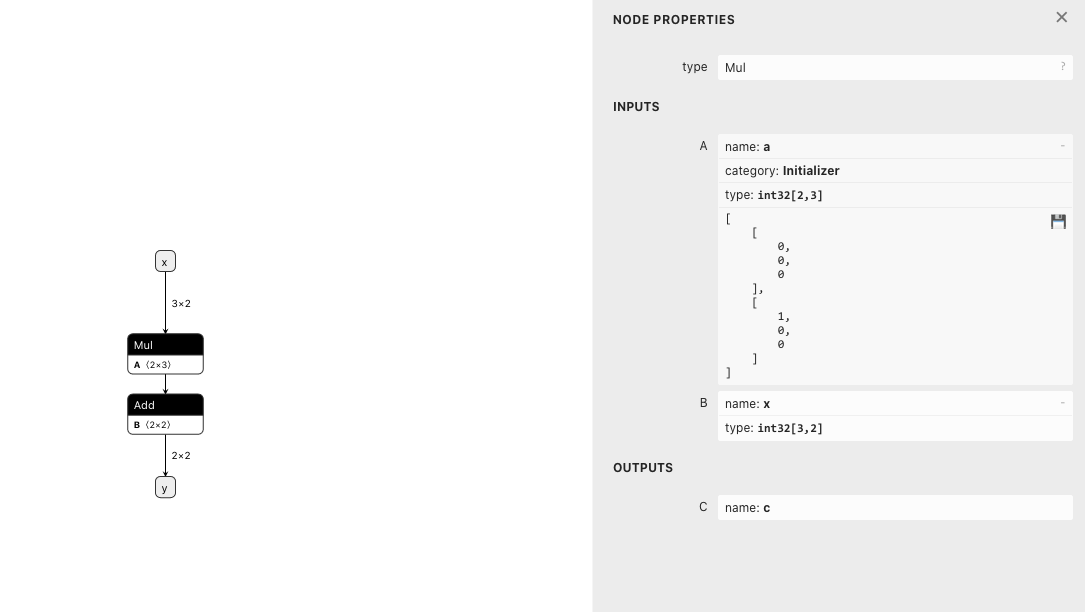

## 参考

+ https://zhuanlan.zhihu.com/p/516920606
+ https://github.com/onnx/onnx/blob/main/onnx/onnx.proto
+ https://zhuanlan.zhihu.com/p/346511883